# Automating Report Genaration with Pandas

Report showing the Annual profit for each product

In [1]:
import pandas as pd

In [2]:
toys_url = "https://raw.githubusercontent.com/asarfraaz/PyPractice/master/data/toys.csv"

# Load the dataset 

In [3]:
df_toys = pd.read_csv(toys_url)

## Find number of rows and columns in this dataset

In [5]:
n_rows, n_cols = df_toys.shape

In [6]:
n_rows

17

In [7]:
n_cols

4

## View first 8 rows

In [8]:
df_toys.head(8)

,Quarter,Product,Expenditure,Revenue
0,2014Q1,Board,274847,338768
1,2014Q1,Wooden,264789,268293
2,2014Q1,Outdoor,278236,282379
3,2014Q2,Outdoor,256237,309898
4,2014Q2,Board,345234,387363
5,2014Q2,Legos,383764,453535
6,2014Q2,Wooden,243462,258273
7,2014Q3,Puzzles,337466,393787


## What is the annual Revenue and Expenditure for each product

|Product|Rev|Exp|
|-|-|-|
|Wooden|1.2|1.0|
|Puzzle|2.0|1.9|

In [15]:
df_toys.pivot_table(index="Product")

# ALERT !!! 
# By default, Pivot aggregates using "mean"

,Expenditure,Revenue
Product,,
Board,360519.500000,401168.75
Legos,457210.333333,510373.00
Outdoor,304783.250000,331140.25
Puzzles,338425.000000,369211.50
Wooden,255748.500000,268217.25


## Calculate Annual expenditure for "Board"

- Fetch rows where "Product" column as values of "Board"

In [11]:
df_toys[ df_toys.Product == "Board" ]

,Quarter,Product,Expenditure,Revenue
0,2014Q1,Board,274847,338768
4,2014Q2,Board,345234,387363
10,2014Q3,Board,445762,483746
12,2014Q4,Board,376235,394798


- Fetch only Expenditure column in the above output

In [12]:
df_toys[ df_toys.Product == "Board" ]['Expenditure']

0     274847
4     345234
10    445762
12    376235
Name: Expenditure, dtype: int64

In [13]:
df_toys[ df_toys.Product == "Board" ]['Expenditure'].sum()

1442078

In [14]:
df_toys[ df_toys.Product == "Board" ]['Expenditure'].mean()

360519.5

In [18]:
pd.__version__

'1.3.4'

In [17]:
df_pvt = df_toys.pivot_table(index="Product",
                    aggfunc='sum',
                   )

df_pvt

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


## Fetch only required columns for creating the Pivot

- Product
- Exp
- Rev

In [20]:
df_toys.columns

Index(['Quarter', 'Product', 'Expenditure', 'Revenue'], dtype='object')

In [23]:
cols = df_toys.columns[1:] 
cols

Index(['Product', 'Expenditure', 'Revenue'], dtype='object')

In [26]:
df_toys[cols].head()

,Product,Expenditure,Revenue
0,Board,274847,338768
1,Wooden,264789,268293
2,Outdoor,278236,282379
3,Outdoor,256237,309898
4,Board,345234,387363


In [29]:
df_toys[cols].pivot_table(index="Product",
                         aggfunc='sum',
                         )

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


## Digression

In [30]:
df_pvt

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


In [32]:
df_pvt.columns

Index(['Expenditure', 'Revenue'], dtype='object')

- What are the index labels / Row labels

In [33]:
df_pvt.index

Index(['Board', 'Legos', 'Outdoor', 'Puzzles', 'Wooden'], dtype='object', name='Product')

In [34]:
df_pvt

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


- Fetch exp and rev for Board

In [36]:
df_pvt.loc['Board']

Expenditure    1442078
Revenue        1604675
Name: Board, dtype: int64

- Fetch exp and rev for Puzzles

In [38]:
df_pvt.loc['Puzzles']

Expenditure    676850
Revenue        738423
Name: Puzzles, dtype: int64

In [39]:
friends = ['Sam', 'Ajay', 'Vishal']

- Fetch for the first name ?

In [40]:
friends[0]

'Sam'

- similarly, for the first row in DataFrame, the index is 0
- The row label for first row in `df_pvt` is "Board"
- It's index value is 0

To fetch the row, based on its index value use : `iloc`

In [41]:
# Fetch first row based on its index value
df_pvt.iloc[0]

Expenditure    1442078
Revenue        1604675
Name: Board, dtype: int64

In [42]:
df_pvt

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


- Use `iloc` to fetch the exp and rev for Puzzles

In [43]:
df_pvt.iloc[-2]

Expenditure    676850
Revenue        738423
Name: Puzzles, dtype: int64

- Fetch information for "Outdoor"

In [44]:
df_pvt.loc['Outdoor']

Expenditure    1219133
Revenue        1324561
Name: Outdoor, dtype: int64

- Fetch information for second row

In [45]:
df_pvt.iloc[1]

Expenditure    1371631
Revenue        1531119
Name: Legos, dtype: int64

In [50]:
df_toys.set_index('Product').loc['Board']

,Quarter,Expenditure,Revenue
Product,,,
Board,2014Q1,274847,338768
Board,2014Q2,345234,387363
Board,2014Q3,445762,483746
Board,2014Q4,376235,394798


## Calculate the Annual Profit for each product

In [51]:
df_pvt

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


In [53]:
df_pvt.Revenue

Product
Board      1604675
Legos      1531119
Outdoor    1324561
Puzzles     738423
Wooden     1072869
Name: Revenue, dtype: int64

In [54]:
df_pvt.Expenditure

Product
Board      1442078
Legos      1371631
Outdoor    1219133
Puzzles     676850
Wooden     1022994
Name: Expenditure, dtype: int64

In [55]:
df_pvt.Revenue - df_pvt.Expenditure

Product
Board      162597
Legos      159488
Outdoor    105428
Puzzles     61573
Wooden      49875
dtype: int64

In [57]:
df_pvt.loc[:, 'Profit'] = df_pvt.Revenue - df_pvt.Expenditure
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442078,1604675,162597
Legos,1371631,1531119,159488
Outdoor,1219133,1324561,105428
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875


In [63]:
df_pvt.reset_index()

,Product,Expenditure,Revenue,Profit
0,Board,1442078,1604675,162597
1,Legos,1371631,1531119,159488
2,Outdoor,1219133,1324561,105428
3,Puzzles,676850,738423,61573
4,Wooden,1022994,1072869,49875


In [58]:
import seaborn as sns

<AxesSubplot:xlabel='Product', ylabel='Profit'>

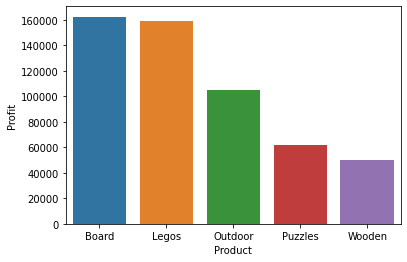

In [67]:
sns.barplot(data = df_pvt.reset_index(),
             y = 'Profit',
             x = 'Product',
            )

## Plot Revenue for each product

In [68]:
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442078,1604675,162597
Legos,1371631,1531119,159488
Outdoor,1219133,1324561,105428
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875


In [70]:
sns.set()

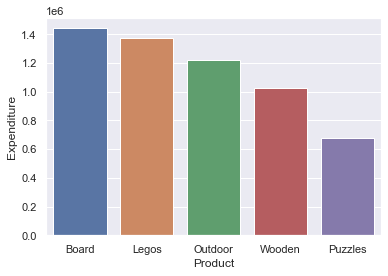

In [87]:
(
    sns.barplot(data=( df_pvt
                       .reset_index()
                       .sort_values('Revenue', 
                                    ascending=False,
                                   ) 
                     ),
            x = 'Product',
            #y = 'Revenue',
            y = 'Expenditure',
           )
);

## Pie chart

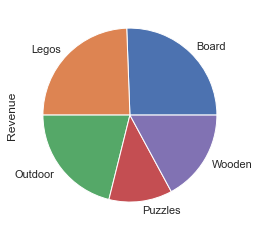

In [82]:
df_pvt.Revenue.plot.pie();

## Sort DataFrame based on column values

In [73]:
df_pvt.sort_values('Revenue')

,Expenditure,Revenue,Profit
Product,,,
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875
Outdoor,1219133,1324561,105428
Legos,1371631,1531119,159488
Board,1442078,1604675,162597


## Save the plot for Annual profit in a file

- Add a title to the image

In [90]:
import matplotlib.pyplot as plt

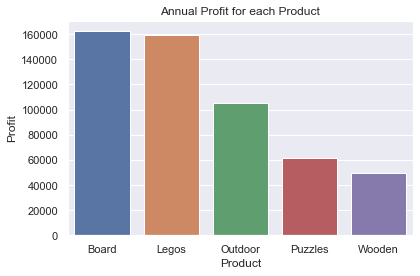

In [97]:
ax = sns.barplot(data = df_pvt.reset_index(),
             y = 'Profit',
             x = 'Product',
            )
plt.title('Annual Profit for each Product');
plt.tight_layout()
plt.savefig('annual_profit.jpg')

In [95]:
ax

<AxesSubplot:title={'center':'Annual Profit for each Product'}, xlabel='Product', ylabel='Profit'>

In [98]:
df_pvt.Revenue - df_pvt.Expenditure

Product
Board      162597
Legos      159488
Outdoor    105428
Puzzles     61573
Wooden      49875
dtype: int64

In [99]:
df_pvt['Test'] = df_pvt.Revenue - df_pvt.Expenditure

In [105]:
dft = df_pvt[df_pvt.Revenue > 999999]
dft

,Expenditure,Revenue,Profit,Test
Product,,,,
Board,1442078,1604675,162597,162597
Legos,1371631,1531119,159488,159488
Outdoor,1219133,1324561,105428,105428
Wooden,1022994,1072869,49875,49875


In [107]:
dft['New'] = dft.Expenditure - dft.Revenue

/var/folders/b3/njv4_yv125j44rpbkvlkn_880000gn/T/ipykernel_74711/1005759770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['New'] = dft.Expenditure - dft.Revenue


In [110]:
dft

,Expenditure,Revenue,Profit,Test,New
Product,,,,,
Board,1442078,1604675,162597,162597,-162597
Legos,1371631,1531119,159488,159488,-159488
Outdoor,1219133,1324561,105428,105428,-105428
Wooden,1022994,1072869,49875,49875,-49875


## How to delete a column

In [112]:
df_pvt

,Expenditure,Revenue,Profit,Test
Product,,,,
Board,1442078,1604675,162597,162597
Legos,1371631,1531119,159488,159488
Outdoor,1219133,1324561,105428,105428
Puzzles,676850,738423,61573,61573
Wooden,1022994,1072869,49875,49875


In [119]:
# df_pvt.drop('Test', axis=1) # Not easy to decipher
df_pvt.drop(columns=['Test'], inplace=True) # More readable

In [120]:
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442078,1604675,162597
Legos,1371631,1531119,159488
Outdoor,1219133,1324561,105428
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875


## Save the Annual Revenue Report in excel file

- The columns should be in the following order
    - Profit
    - Revenue
    - Expenditure
- Also include the image in it

In [121]:
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442078,1604675,162597
Legos,1371631,1531119,159488
Outdoor,1219133,1324561,105428
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875


In [123]:
cols = df_pvt.columns
cols

Index(['Expenditure', 'Revenue', 'Profit'], dtype='object')

In [125]:
cols[::-1] # Reverse the order

Index(['Profit', 'Revenue', 'Expenditure'], dtype='object')

In [126]:
df_pvt.columns[::-1]

Index(['Profit', 'Revenue', 'Expenditure'], dtype='object')

In [127]:
df_pvt[df_pvt.columns[::-1]]

,Profit,Revenue,Expenditure
Product,,,
Board,162597,1604675,1442078
Legos,159488,1531119,1371631
Outdoor,105428,1324561,1219133
Puzzles,61573,738423,676850
Wooden,49875,1072869,1022994


## Save the Annual Revenue Report in excel file

- The columns should be in the following order
    - Revenue
    - Expenditure
    - Profit
- Also include the image in it





In [130]:
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442078,1604675,162597
Legos,1371631,1531119,159488
Outdoor,1219133,1324561,105428
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875


In [131]:
cols = df_pvt.columns.to_list()

In [132]:
cols

['Expenditure', 'Revenue', 'Profit']

In [134]:
# Prefer to do this, instead of writing the names of columns
new_cols = [ cols[1], cols[0], cols[-1] ]
new_cols

['Revenue', 'Expenditure', 'Profit']

In [137]:
df_pvt['Revenue']

Product
Board      1604675
Legos      1531119
Outdoor    1324561
Puzzles     738423
Wooden     1072869
Name: Revenue, dtype: int64

In [138]:
df_pvt.columns

Index(['Expenditure', 'Revenue', 'Profit'], dtype='object')

In [139]:
df_pvt.columns[ [1, 0, -1] ]

Index(['Revenue', 'Expenditure', 'Profit'], dtype='object')

In [140]:
df_pvt[new_cols]

,Revenue,Expenditure,Profit
Product,,,
Board,1604675,1442078,162597
Legos,1531119,1371631,159488
Outdoor,1324561,1219133,105428
Puzzles,738423,676850,61573
Wooden,1072869,1022994,49875


In [142]:
excel_filename = "Annual_Report.xlsx"
year = "2014"


In [144]:
# Only for storing DataFrame in an excel file
# df_pvt[new_cols].to_excel(excel_filename)

In [145]:
# Storing DataFrame and a plot in excel file

from io import BytesIO

imgdata = BytesIO()
ax.figure.savefig(imgdata)

In [149]:
! pip install xlsxwriter


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [150]:
with pd.ExcelWriter(excel_filename, engine='xlsxwriter') as FH:
    df_pvt.to_excel(FH, sheet_name=year)
    shobj = FH.sheets[year]
    shobj.insert_image('E4', '', {'image_data': imgdata})